In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from scipy.stats import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [31]:
df = pd.read_csv('/content/train.csv' , usecols = ["Survived","Age","Fare"])

In [32]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [33]:
df["Age"].fillna(df["Age"].mean(), inplace =True )
df.isnull().sum()

<ipython-input-33-8b24db448a43>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace =True )


,0
Survived,0
Age,0
Fare,0


In [34]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [35]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [36]:
X_train.shape

(712, 2)

In [37]:
X_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


<ipython-input-40-0ffc15c0fab1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train["Age"])


Text(0.5, 1.0, 'Age QQ Plot')

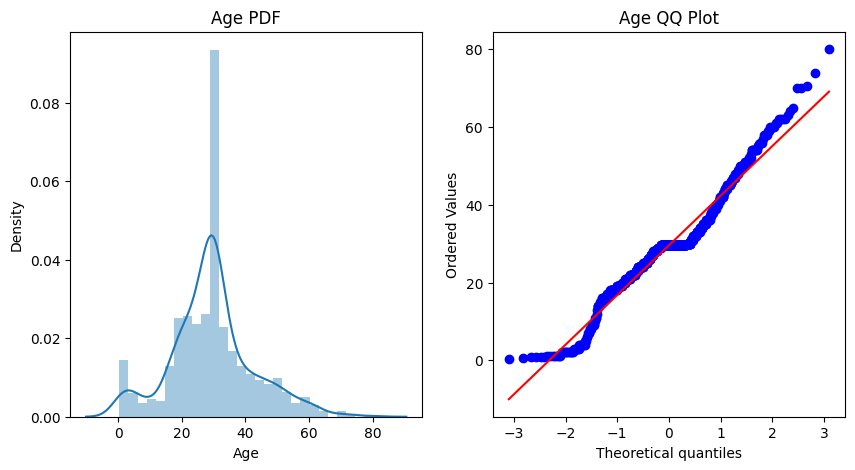

In [40]:
from scipy.stats import probplot
plt.figure(figsize = (10,5))
plt.subplot(121)
sns.distplot(X_train["Age"])
plt.title("Age PDF")

plt.subplot(122)
probplot(X_train["Age"] ,plot = plt )
plt.title("Age QQ Plot")

<ipython-input-41-f3bc192119d8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train["Fare"])


Text(0.5, 1.0, 'Fare QQ Plot')

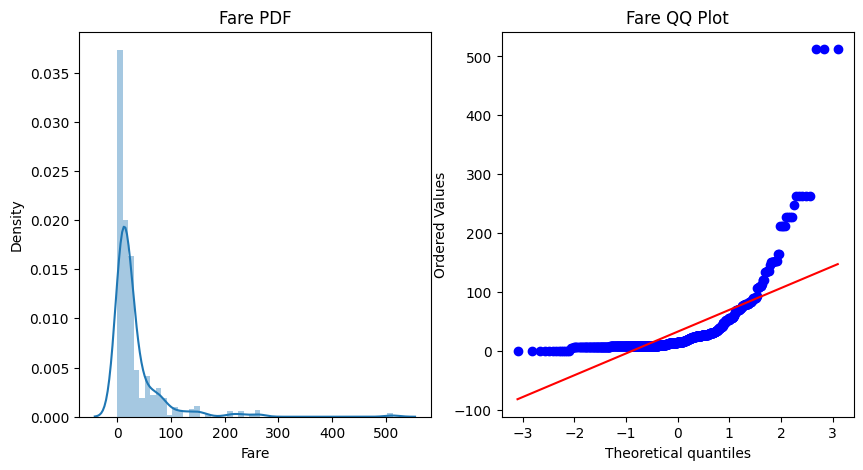

In [41]:
plt.figure(figsize = (10,5))
plt.subplot(121)
sns.distplot(X_train["Fare"])
plt.title("Fare PDF")

plt.subplot(122)
probplot(X_train["Fare"] ,plot = plt )
plt.title("Fare QQ Plot")

In [42]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [43]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

In [45]:
print("Accuracy LR:" , accuracy_score(y_test,y_pred))
print("Accuracy DT:" , accuracy_score(y_test,y_pred2))

Accuracy LR: 0.6480446927374302
Accuracy DT: 0.664804469273743


In [46]:
trf = FunctionTransformer(func = np.log1p)

In [47]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [49]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [50]:
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [51]:
y_pred = clf.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

In [52]:
print("Accuracy LR: ",accuracy_score(y_test,y_pred))
print("Accuracy DT: ",accuracy_score(y_test,y_pred2))

Accuracy LR:  0.6815642458100558
Accuracy DT:  0.6871508379888268


In [53]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR:",np.mean(cross_val_score(clf,X_transformed,y,scoring = "accuracy",cv = 10)))
print("DT:",np.mean(cross_val_score(clf2,X_transformed,y,scoring = "accuracy",cv = 10)))

LR: 0.678027465667915
DT: 0.6588389513108613


<ipython-input-55-d0cce9445514>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train["Fare"])
<ipython-input-55-d0cce9445514>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed["Fare"])


Text(0.5, 1.0, 'Fare Dist After')

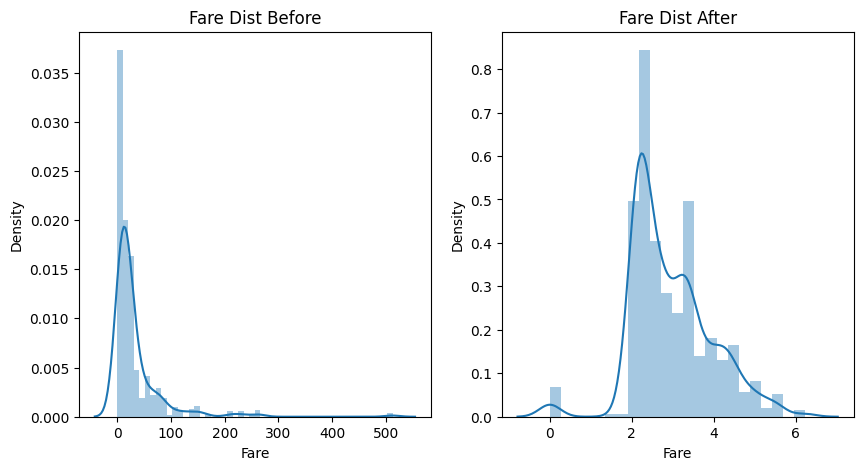

In [55]:
plt.figure(figsize = (10 , 5))

plt.subplot(121)
sns.distplot(X_train["Fare"])
plt.title("Fare Dist Before")

plt.subplot(122)
sns.distplot(X_train_transformed["Fare"])
plt.title("Fare Dist After")

Text(0.5, 1.0, 'Fare PDF After')

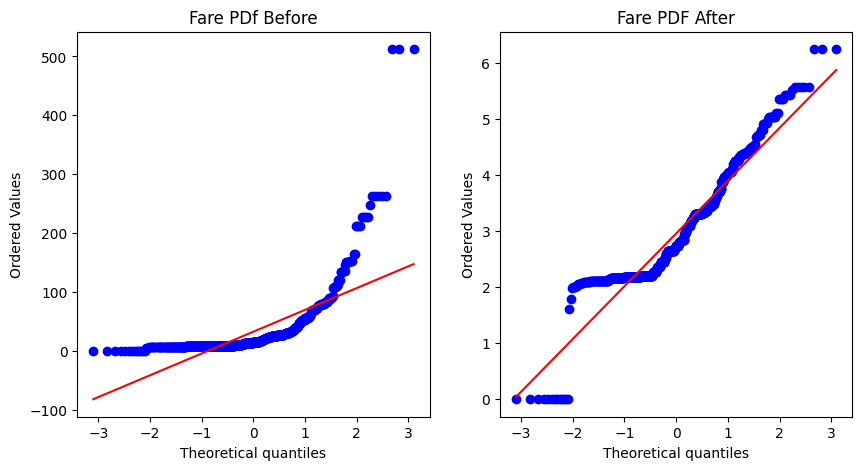

In [56]:
plt.figure(figsize = (10 , 5))

plt.subplot(121)
probplot(X_train["Fare"] , plot = plt)
plt.title("Fare PDf Before")

plt.subplot(122)
probplot(X_train_transformed["Fare"] , plot = plt)
plt.title("Fare PDF After")

Text(0.5, 1.0, 'Age PDF After')

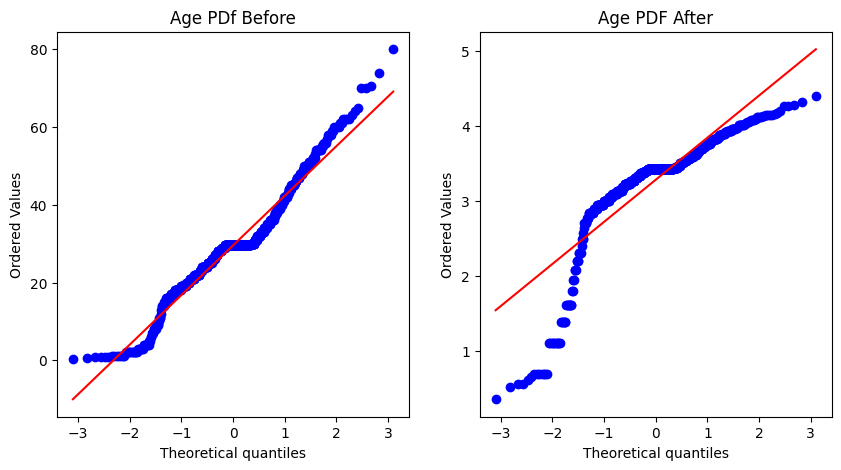

In [57]:
plt.figure(figsize = (10 , 5))

plt.subplot(121)
probplot(X_train["Age"] , plot = plt)
plt.title("Age PDf Before")

plt.subplot(122)
probplot(X_train_transformed["Age"] , plot = plt)
plt.title("Age PDF After")

In [58]:
trf2 = ColumnTransformer(
    transformers= [
        ("log" , FunctionTransformer(func = np.log1p) , ["Fare"])
    ],
    remainder = "passthrough"
)

In [59]:
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [60]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR: ",accuracy_score(y_test,y_pred))
print("Accuracy DT: ",accuracy_score(y_test,y_pred2))

Accuracy LR:  0.6703910614525139
Accuracy DT:  0.6871508379888268


In [61]:
X_transformed2 = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR:",np.mean(cross_val_score(clf,X_transformed2,y,scoring = "accuracy",cv = 10)))
print("DT:",np.mean(cross_val_score(clf2,X_transformed2,y,scoring = "accuracy",cv = 10)))

LR: 0.678027465667915
DT: 0.6588139825218478


In [64]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()


Accuracy 0.6431335830212235


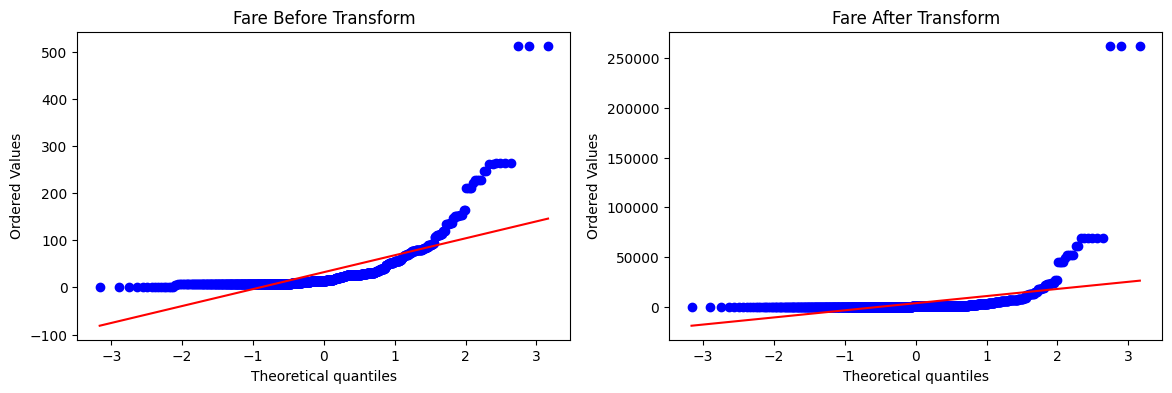

In [65]:
apply_transform(lambda x : x**2)

Accuracy 0.6262796504369538


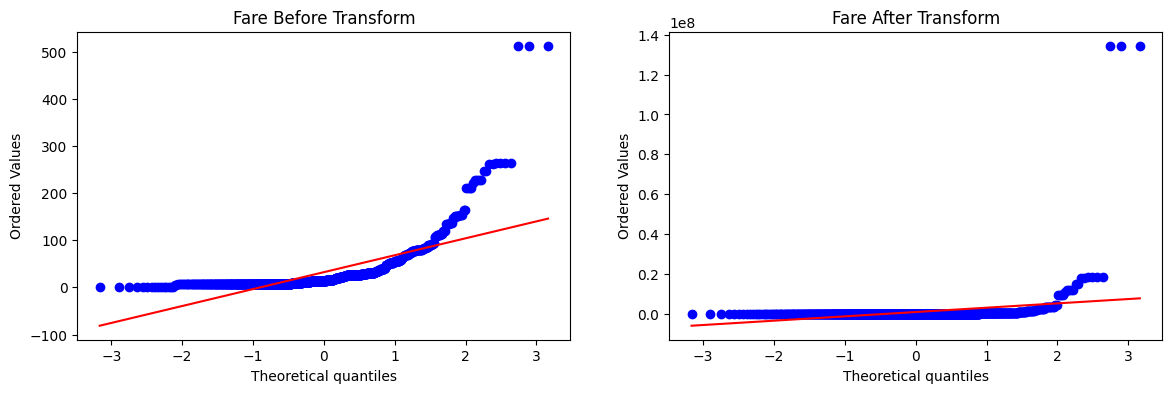

In [66]:
apply_transform(lambda x : x**3)

Accuracy 0.6589013732833957


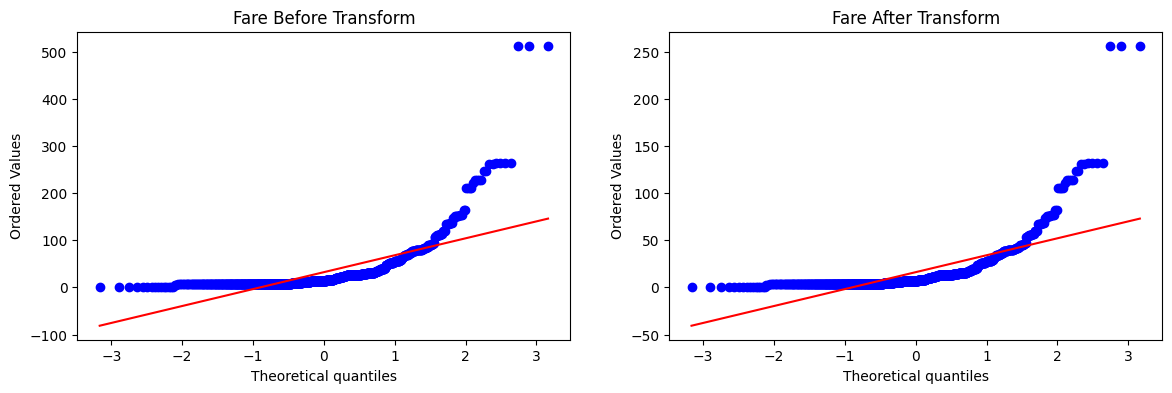

In [67]:
apply_transform(lambda x : x**1/2)

Accuracy 0.61729088639201


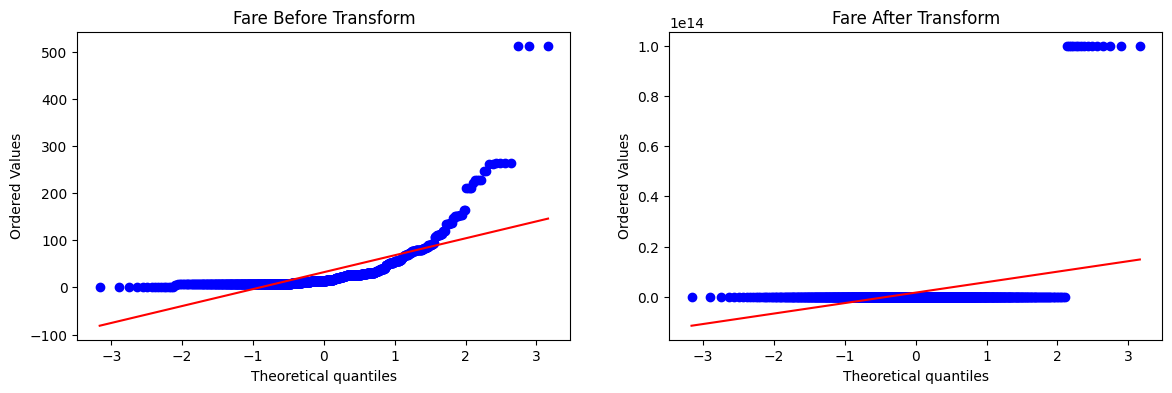

In [70]:
apply_transform(lambda x : 1/(x+0.00000000000001))

Accuracy 0.6195131086142323


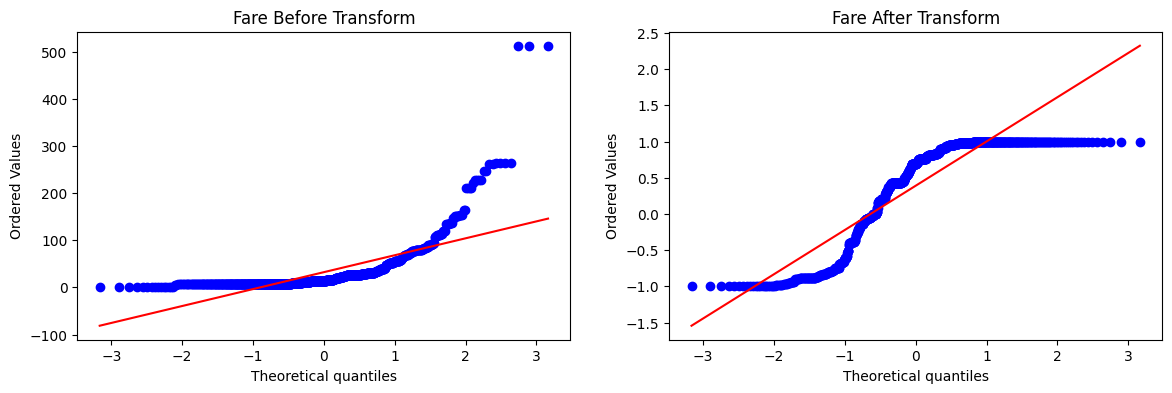

In [71]:
apply_transform(lambda x : np.sin(x))

Accuracy 0.6184144818976279


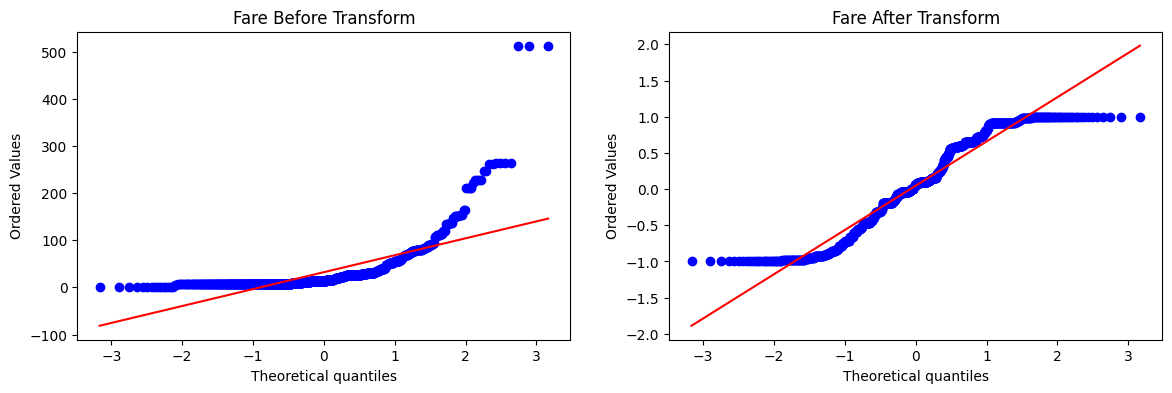

In [72]:
apply_transform(lambda x : np.cos(x))